In [1]:
import numpy as np
import pandas as pd
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers, losses, activations, models
from keras.layers.convolutional import Conv1D, MaxPooling1D, SeparableConv1D,Convolution1D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils import plot_model
from keras.layers import Input, GlobalAveragePooling1D,GlobalMaxPool1D,MaxPool1D
from keras import models
from keras.models import Model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, recall_score
from keras.models import load_model

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("C:/Users/thin/Desktop/AI_ECG/TRAIN_DATA_284_loc.csv", header=None)
#df_train = df_train.sample(frac=1)
df_test = pd.read_csv("C:/Users/thin/Desktop/AI_ECG/TEST_DATA_284_loc.csv", header=None)

Y = np.array(df_train[284].values).astype(np.int8)
X = np.array(df_train[list(range(284))].values)[..., np.newaxis]

Y_test = np.array(df_test[284].values).astype(np.int8)
X_test = np.array(df_test[list(range(284))].values)[..., np.newaxis]

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 284, 1)       0                                            
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 265, 8)       168         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 246, 8)       1288        conv1d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 123, 8)       0           conv1d_9[0][0]                   
____________________________________________________________________________________________

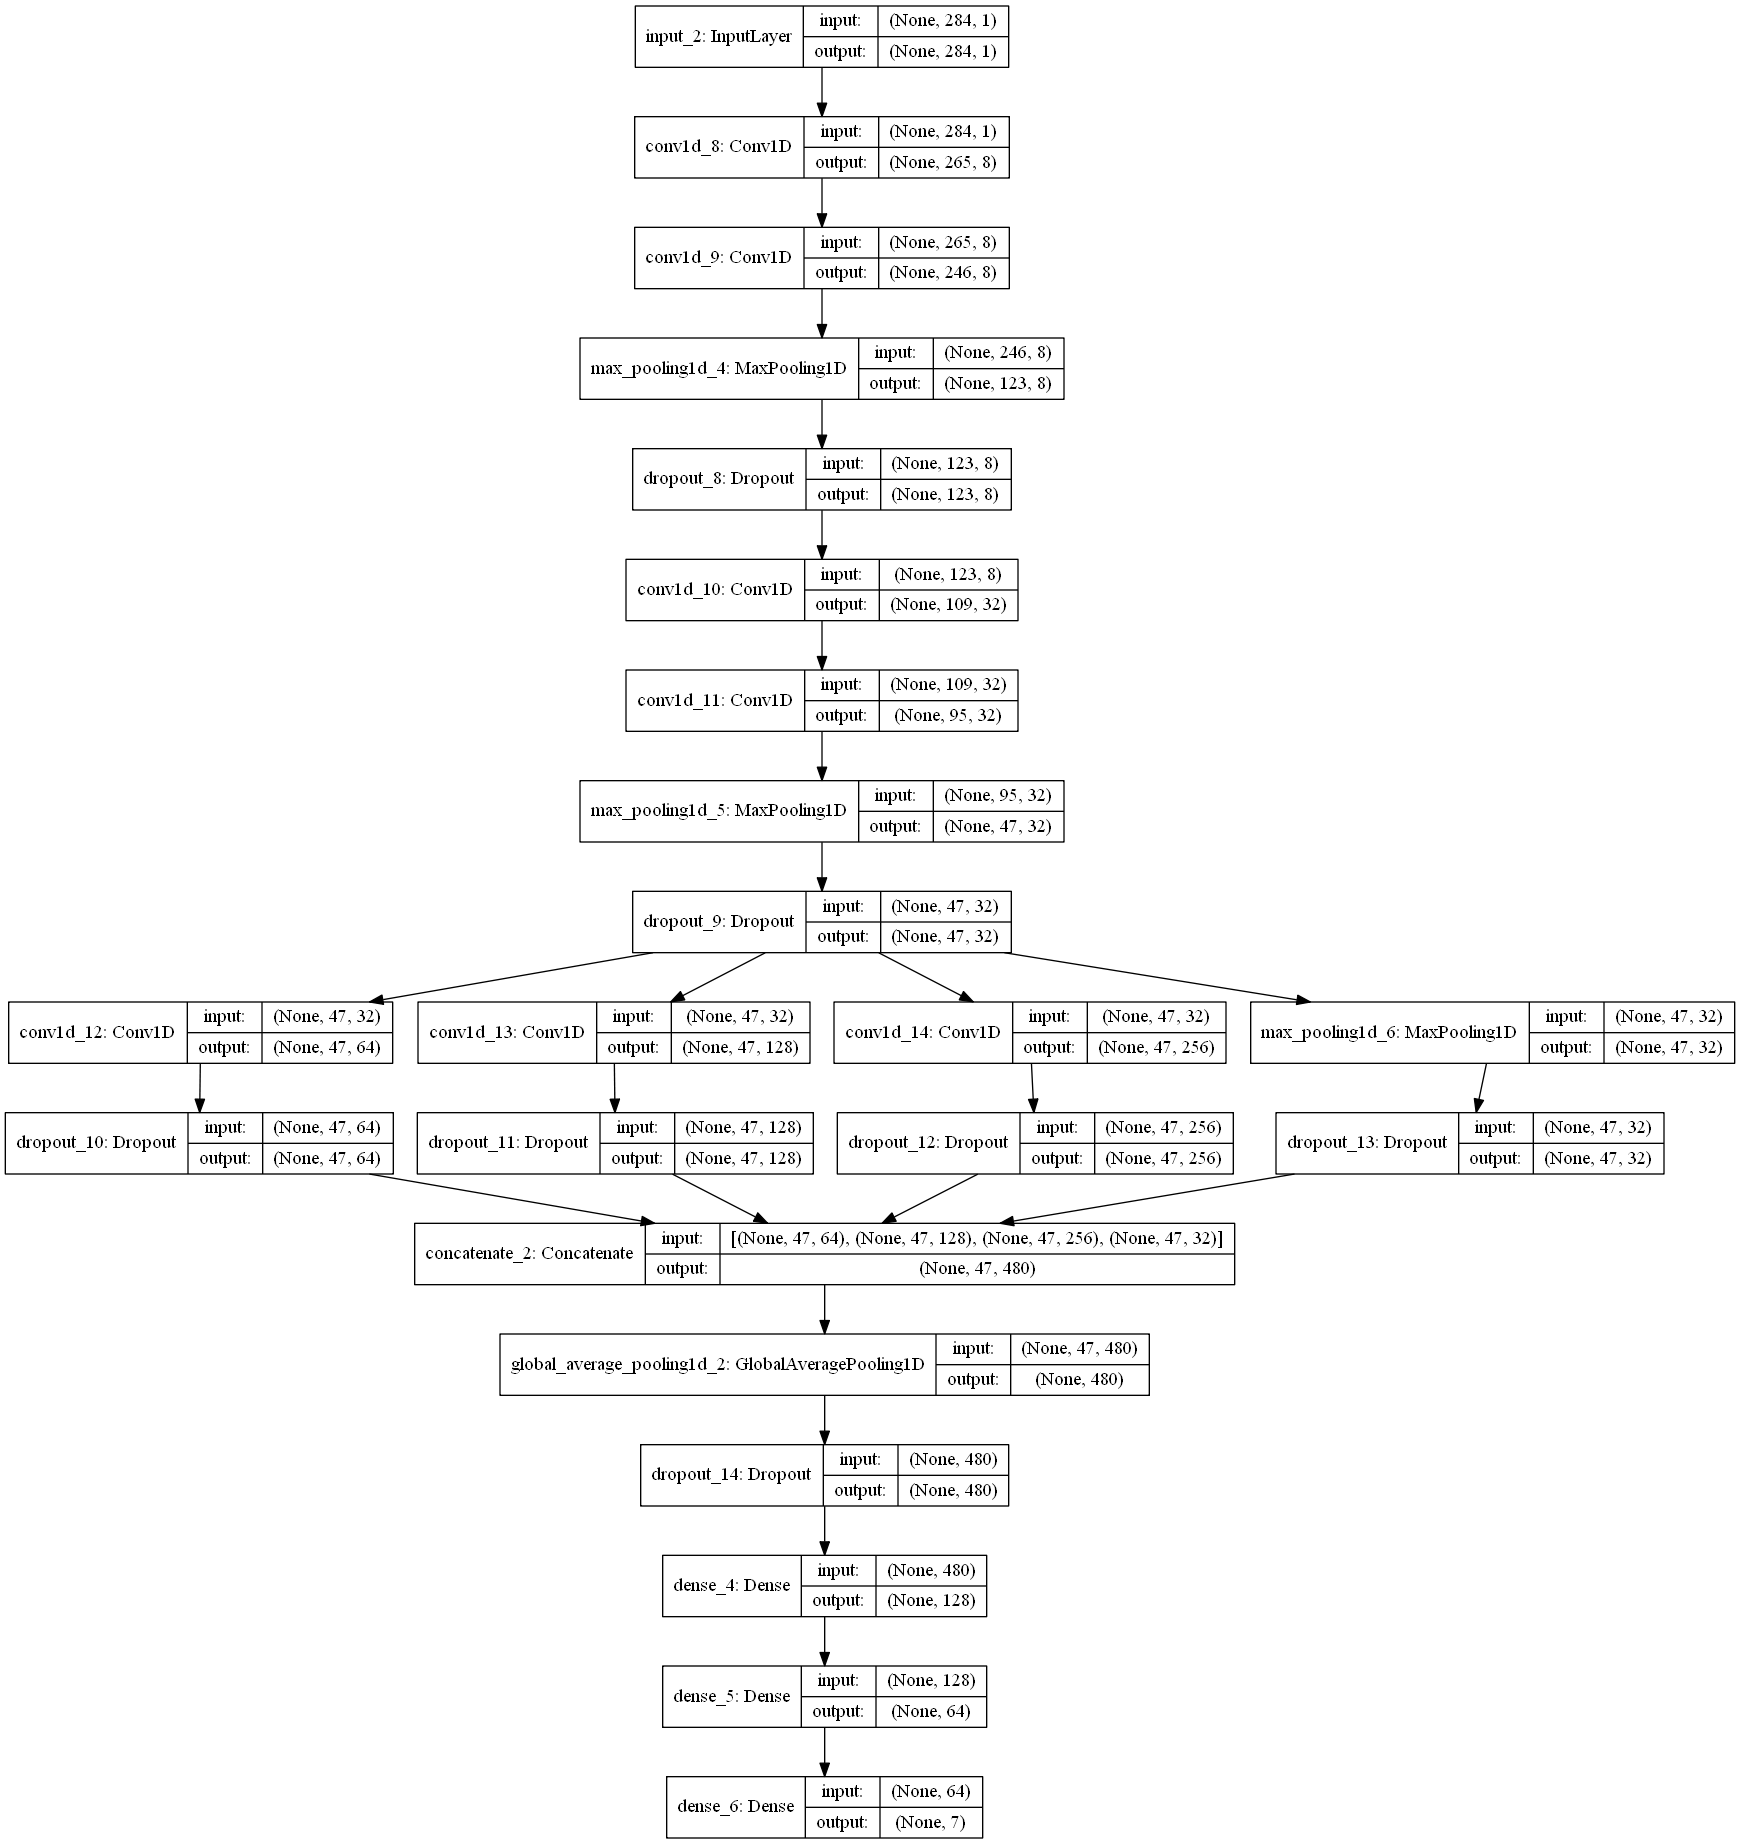

In [12]:
input_img = Input(shape=(284, 1))
nClasses = 7
###0st layer
#layer_0 = Conv1D(16, 15, padding="valid", activation='relu')(input_img)
#layer_0 = MaxPooling1D(2, strides=1, padding='same')(layer_0)
img_1 = Convolution1D(8, kernel_size=20, activation=activations.relu, padding="valid")(input_img)
img_1 = Convolution1D(8, kernel_size=20, activation=activations.relu, padding="valid")(img_1)
img_1 = MaxPool1D(pool_size=2)(img_1)
img_1 = Dropout(rate=0.2)(img_1)
img_1 = Convolution1D(32, kernel_size=15, activation=activations.relu, padding="valid")(img_1)
img_1 = Convolution1D(32, kernel_size=15, activation=activations.relu, padding="valid")(img_1)
img_1 = MaxPool1D(pool_size=2)(img_1)
layer_01 = Dropout(rate=0.2)(img_1)
###################################################################################################
### 1st layer
layer_1 = Conv1D(64, 15, padding='same', activation='relu')(layer_01)
layer_1 = Dropout(rate=0.1)(layer_1)
### 2nd layer
layer_2 = Conv1D(128, 15, padding='same', activation='relu')(layer_01)
layer_2 = Dropout(rate=0.1)(layer_2)
### 3rd layer
layer_3 = Conv1D(256, 15, padding='same', activation='relu')(layer_01)
layer_3 = Dropout(rate=0.1)(layer_3)
### 4th layer
layer_4 = MaxPooling1D(pool_size=2, strides=1, padding='same')(layer_01)
layer_4 = Dropout(rate=0.1)(layer_4)
### Concatenate
layer_02 = keras.layers.concatenate([layer_1, layer_2, layer_3, layer_4])
#img_1 = MaxPool1D(pool_size=2, strides=1, padding='same')(img_1)
#layer_02 = Dropout(rate=0.2)(flat_1)
#####################################################################################################

#####################################################################################################
flat_2_b = GlobalAveragePooling1D()(layer_02)
drop_2_b = Dropout(rate=0.2)(flat_2_b)
dense_1 = Dense(128, activation='relu')(drop_2_b)
dense_2 = Dense(64, activation='relu')(dense_1)

output = Dense(nClasses, activation='softmax')(dense_2)
model = Model([input_img], output)
print(model.summary())
plot_model(model, to_file='model_googlenet_copy3.png', show_shapes=True, show_layer_names=True)

In [13]:
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
opt = optimizers.Adam(0.001)

model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])


file_path = "GoogLeNet_284_loc_1.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

h=model.fit(X, Y, epochs=100, batch_size=1000, verbose=1, callbacks=callbacks_list, validation_split=0.2)
model.load_weights(file_path)

Train on 64253 samples, validate on 16064 samples
Epoch 1/100
64253/64253 [==============================] - 54s 842us/step - loss: 1.1828 - acc: 0.6402 - val_loss: 0.9590 - val_acc: 0.6495

Epoch 00001: val_acc improved from -inf to 0.64946, saving model to GoogLeNet_284_loc_1.h5
Epoch 2/100
64253/64253 [==============================] - 54s 843us/step - loss: 0.7993 - acc: 0.7204 - val_loss: 0.6361 - val_acc: 0.8086

Epoch 00002: val_acc improved from 0.64946 to 0.80858, saving model to GoogLeNet_284_loc_1.h5
Epoch 3/100
64253/64253 [==============================] - 54s 842us/step - loss: 0.5000 - acc: 0.8497 - val_loss: 0.3613 - val_acc: 0.9000

Epoch 00003: val_acc improved from 0.80858 to 0.90002, saving model to GoogLeNet_284_loc_1.h5
Epoch 4/100
64253/64253 [==============================] - 54s 839us/step - loss: 0.3495 - acc: 0.9032 - val_loss: 0.2701 - val_acc: 0.9262

Epoch 00004: val_acc improved from 0.90002 to 0.92617, saving model to GoogLeNet_284_loc_1.h5
Epoch 5/100
6


Epoch 00037: val_acc improved from 0.98606 to 0.98680, saving model to GoogLeNet_284_loc_1.h5
Epoch 38/100
64253/64253 [==============================] - 52s 807us/step - loss: 0.0480 - acc: 0.9853 - val_loss: 0.0435 - val_acc: 0.9867

Epoch 00038: val_acc did not improve from 0.98680
Epoch 39/100
64253/64253 [==============================] - 52s 809us/step - loss: 0.0469 - acc: 0.9858 - val_loss: 0.0437 - val_acc: 0.9866

Epoch 00039: val_acc did not improve from 0.98680
Epoch 40/100
64253/64253 [==============================] - 52s 814us/step - loss: 0.0470 - acc: 0.9856 - val_loss: 0.0427 - val_acc: 0.9873

Epoch 00040: val_acc improved from 0.98680 to 0.98730, saving model to GoogLeNet_284_loc_1.h5
Epoch 41/100
64253/64253 [==============================] - 53s 821us/step - loss: 0.0470 - acc: 0.9858 - val_loss: 0.0444 - val_acc: 0.9866

Epoch 00041: val_acc did not improve from 0.98730
Epoch 42/100
64253/64253 [==============================] - 51s 799us/step - loss: 0.0466 - a

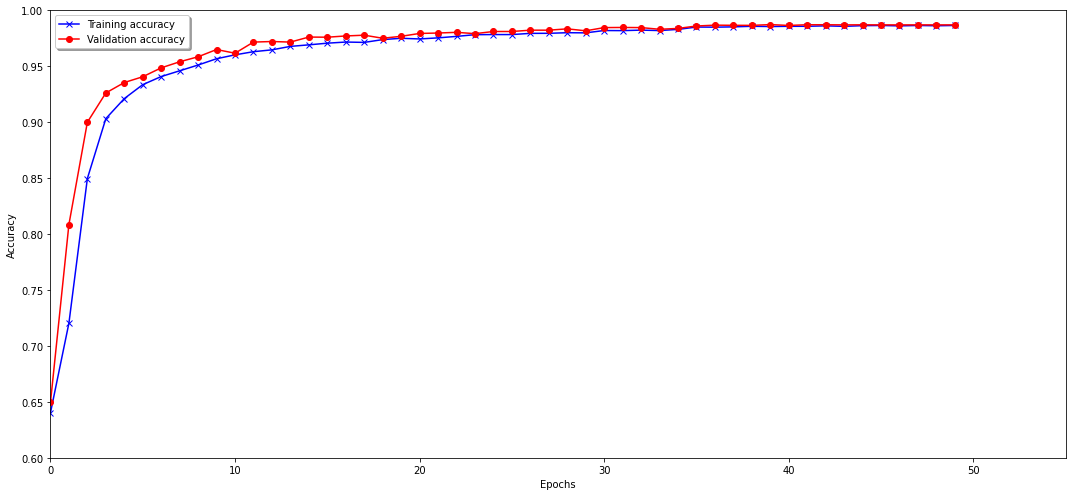

In [19]:
import matplotlib.pyplot as plt
'''fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(h.history['loss'], 'x-',color='b', label="Training loss")
ax1.plot(h.history['val_loss'],'o-', color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(h.history['acc'], 'x-',color='b', label="Training accuracy")
ax2.plot(h.history['val_acc'],'o-', color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))

legend = plt.legend(loc='best', shadow=True)'''
plt.figure(figsize=(15, 7))
plt.plot(h.history['acc'], 'x-',color='b', label="Training accuracy")
plt.plot(h.history['val_acc'], 'o-',color='r',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,55)
plt.ylim(0.6,1)

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()
hist_df = pd.DataFrame(h.history) 
# or save to csv: 
hist_csv_file = 'history_GoogleNet.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [3]:
model = load_model('GoogLeNet_284_loc_1.h5')

In [4]:
pred_test = model.predict(X_test,verbose=1)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)
from sklearn.metrics import recall_score
recall = recall_score(Y_test, pred_test, average="macro")
print("Recall : %s "% recall)

20076/20076 [==============================] - 18s 895us/step
Test f1 score : 0.9742676868522703 
Test accuracy score : 0.9896393703925085 
Recall : 0.9688526917422227 


Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13007
           1       1.00      1.00      1.00      1514
           2       1.00      1.00      1.00      1446
           3       0.95      0.89      0.92       500
           4       0.98      0.99      0.98      1244
           5       0.98      1.00      0.99      1388
           6       0.96      0.91      0.94       977

    accuracy                           0.99     20076
   macro avg       0.98      0.97      0.97     20076
weighted avg       0.99      0.99      0.99     20076

Confusion matrix
[[12965     1     0    14     8     0    19]
 [    3  1507     0     0     4     0     0]
 [    1     0  1445     0     0     0     0]
 [   47     0     0   447     1     0     5]
 [    0     4     0     3  1230     0     7]
 [    0     0     0     0     0  1385     3]
 [   43     1     0     9    11    24   889]]


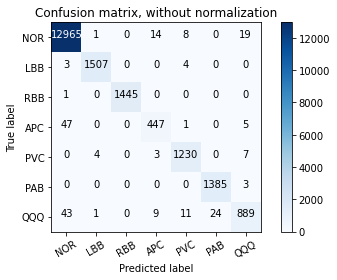

In [17]:
c=confusion_matrix(Y_test,pred_test)
print('Classification Report')
print(classification_report(Y_test, pred_test))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    print('Confusion matrix')
    print(cm)
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(c, classes=['NOR', 'LBB', 'RBB', 'APC', 'PVC', 'PAB', 'QQQ'],
                      title='Confusion matrix, without normalization')

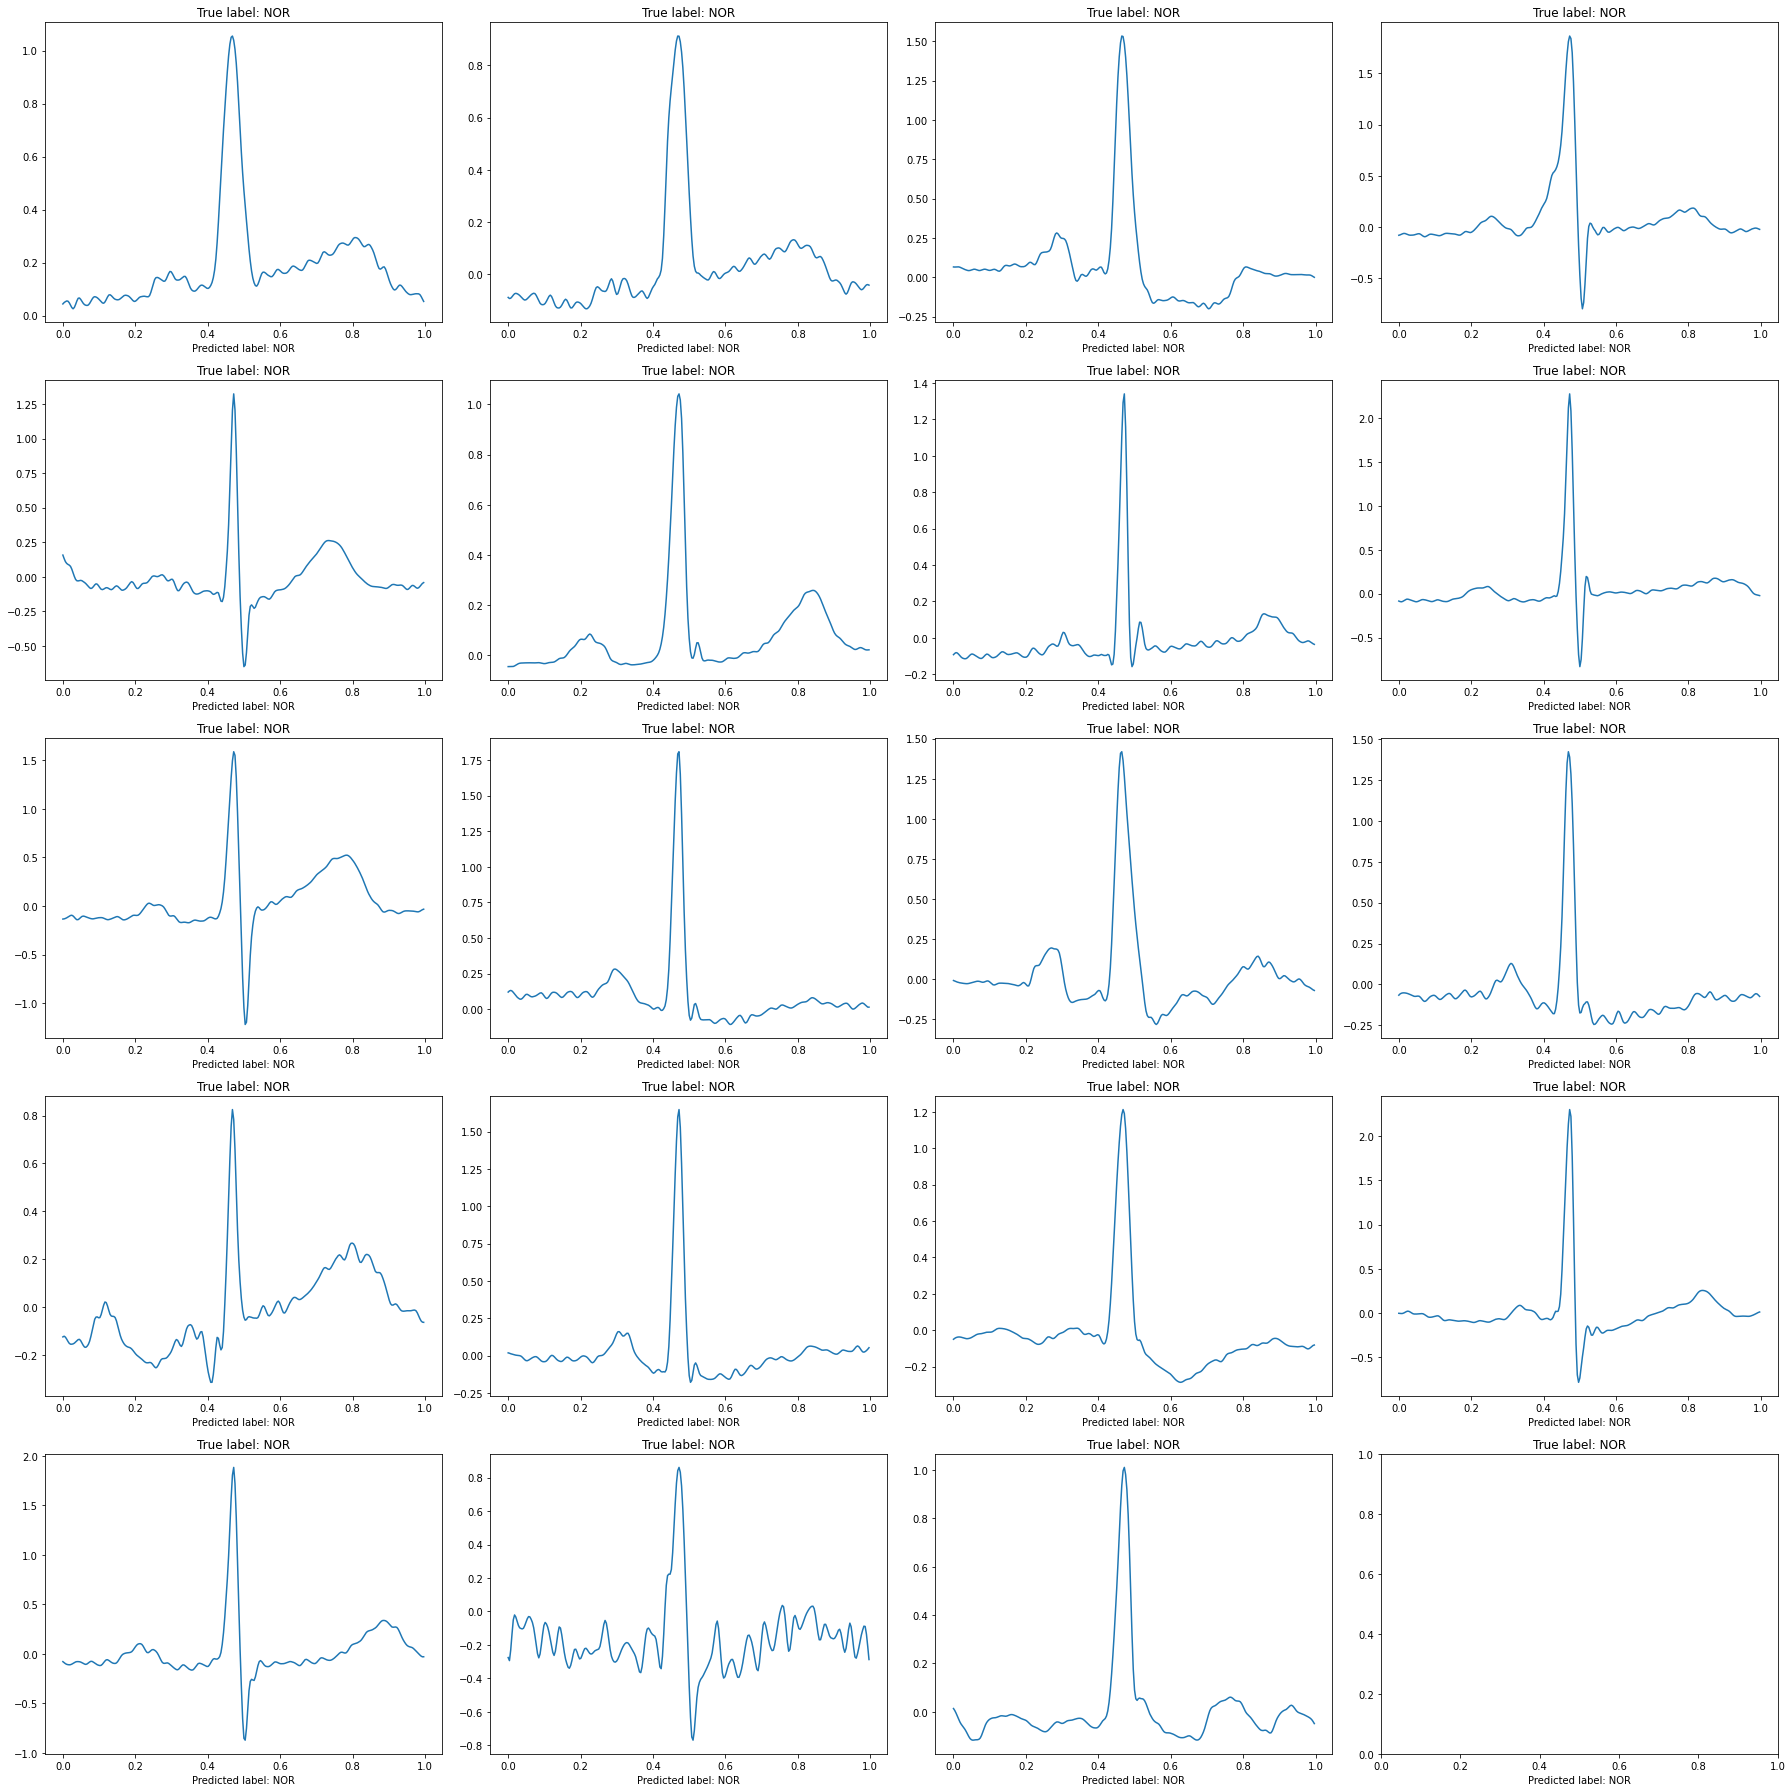

In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
True_Label=list()
Pred_Label=list()
i=np.random.randint(0,1400,20)
#i=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
t=np.arange(0,284)
ts=t/284
for j in range(len(i)):
    if Y_test[i[j]]==0:
        True_Label.append('NOR')
    elif Y_test[i[j]]==1:
        True_Label.append('LBB')
    elif Y_test[i[j]]==2:
        True_Label.append('RBB')
    elif Y_test[i[j]]==3:
        True_Label.append('APC')
    elif Y_test[i[j]]==4:
        True_Label.append('PVC')
    elif Y_test[i[j]]==5:
        True_Label.append('PAB')
    elif Y_test[i[j]]==6:
        True_Label.append('QQQ')
for j in range(len(i)):
    if pred_test[i[j]]==0:
        Pred_Label.append('NOR')
    elif pred_test[i[j]]==1:
        Pred_Label.append('LBB')
    elif pred_test[i[j]]==2:
        Pred_Label.append('RBB')
    elif pred_test[i[j]]==3:
        Pred_Label.append('APC')
    elif pred_test[i[j]]==4:
        Pred_Label.append('PVC')
    elif pred_test[i[j]]==5:
        Pred_Label.append('PAB')
    elif pred_test[i[j]]==6:
        Pred_Label.append('QQQ')
for j in range(len(i)):
    plt.plot(ts,X_test[i[j-1]])
    plt.subplot(5, 4, j+1)
    plt.xlabel('Predicted label: '+ Pred_Label[j])
    plt.title('True label: '+ True_Label[j])
plt.tight_layout()
plt.show()